In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = pd.read_csv('weightedX.csv').values
Y = pd.read_csv('weightedY.csv').values

In [5]:
print(X.shape, Y.shape)

(99, 1) (99, 1)


In [6]:
## Normalize the data
X = (X - X.mean())/X.std()

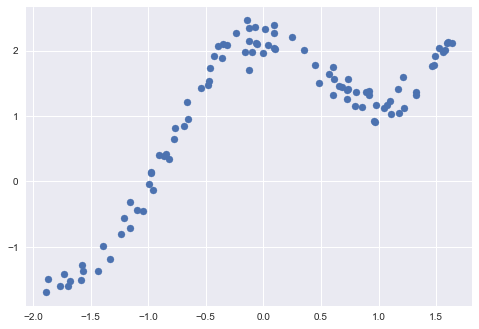

In [7]:
plt.style.use("seaborn")
plt.scatter(X, Y)
plt.show()

# Find weight (W matrix) at a point for locally weighted regression

In [8]:
## W(i) is a weight of every training point
def getWeightMatrix(X, queryPoint, tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        xi = X[i]
        x = queryPoint
        W[i, i] = np.exp( ((xi-x)*(xi-x).T)/(-2*tau*tau) )
    
    return W

In [16]:
W = getWeightMatrix(X, 1.5, 1)

In [17]:
print(W.shape)
print(W)

(99, 99)
[[0.17829447 0.         0.         ... 0.         0.         0.        ]
 [0.         0.06815112 0.         ... 0.         0.         0.        ]
 [0.         0.         0.17914099 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.3304325  0.         0.        ]
 [0.         0.         0.         ... 0.         0.66997095 0.        ]
 [0.         0.         0.         ... 0.         0.         0.96171346]]


In [18]:
W_ = getWeightMatrix(X, 1.5, 100)
print(W_)

[[0.99982758 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99973143 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99982806 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99988927 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99995995 0.        ]
 [0.         0.         0.         ... 0.         0.         0.9999961 ]]


In [19]:
## large tau brings the weight to identity matrix 
## and the algorithm would perform like linear regression

# Compute theta for a query point

In [21]:
## theta = (X'WX)inv * X'WY -> X' is X transpose

In [25]:
def prediction(X, Y, query_x, tau):
    m = X.shape[0]
    X0 = np.ones((m,1))
    X = np.hstack((X0, X))
    
    qx = np.mat([1, query_x])
    # find weight of data-points
    W = getWeightMatrix(X, qx, tau)
    
    # compute theta
    theta = np.linalg.pinv(X.T*W*X) * (X.T*W*Y)
    
    # compute Y predict
    pred = np.dot(qx, theta)
    
    return theta, pred

In [26]:
theta, pred = prediction(X, Y, 1, 1)

In [27]:
pred

matrix([[1.59417694]])

# Effect of tau

In [45]:
def getPredictions(X, Y, tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    
    for xq in X_test:
        theta, pred = prediction(X, Y, xq, tau)
        Y_test.append(pred[0][0])
        
    XO = np.array(X)
    YO = np.array(Y)
        
    plt.style.use('seaborn')
    plt.scatter(X, Y)
    plt.scatter(X_test, Y_test, color='red')
    plt.title("tau/bandwidth : %.2f" %tau)
    plt.show()

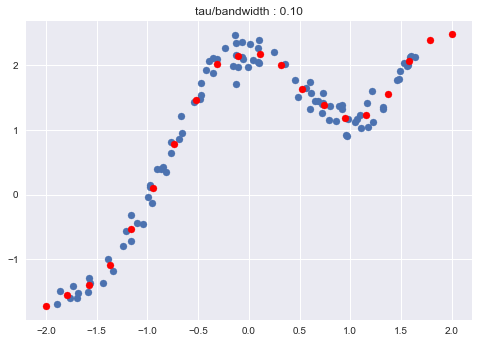

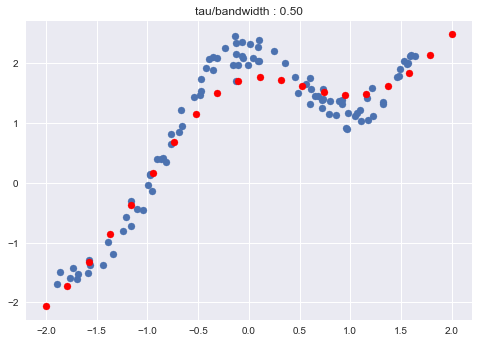

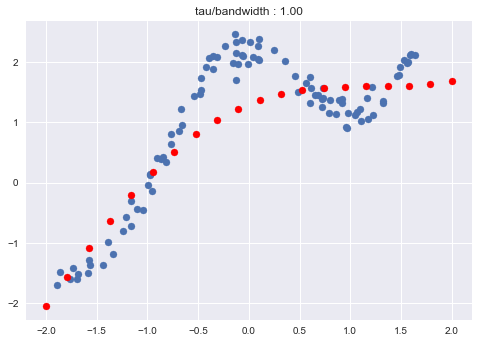

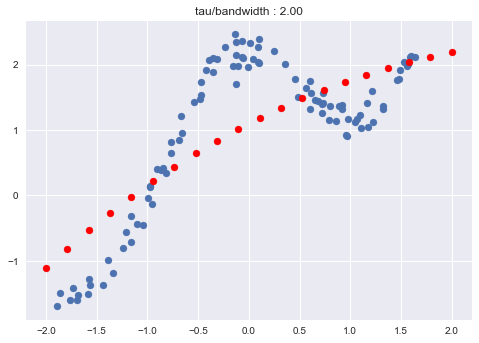

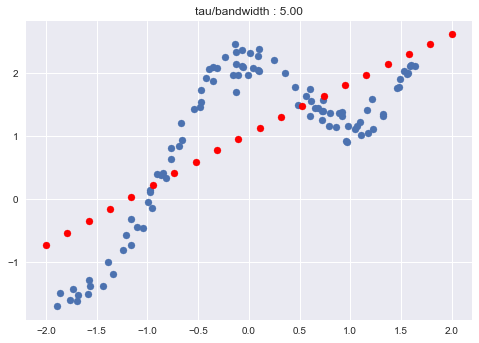

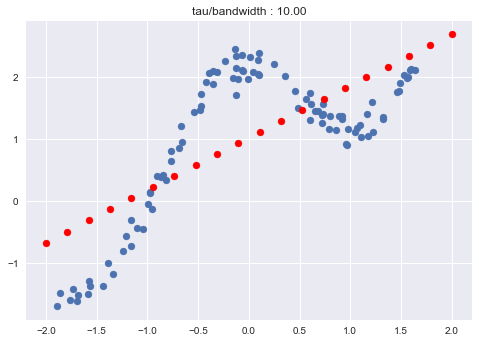

In [47]:
taus = [0.1, 0.5, 1, 2, 5, 10]

for tau in taus:
    getPredictions(X, Y, tau)